## Demonstration of layer sharing on LeNet-5

In [1]:
PATH_PREFIX = '../../'
import sys
sys.path.append(PATH_PREFIX)

In [2]:
import torch
import torch.nn as nn
import pandas as pd
import copy
import os

from data.mnist import MnistDataset
from data.utils.mnist_utils import *
from models.lenet.lenet import LeNet5
from utils.quantize import *
from utils.weight_sharing import *
from utils.plot import *

Parameters

In [3]:
LEARNING_RATE = 0.0001
BATCH_SIZE = 32
N_CLASSES = 10
DEVICE = None
EPOCHS = 100

NET_TYPE = 'relu'
NET_PATH =  os.path.join(PATH_PREFIX, f'models/lenet/saves/lenet_{NET_TYPE}.save')
SAVE_DATA = os.path.join(PATH_PREFIX, 'results/test_share.csv')

Setting up the components

In [4]:
dataset = MnistDataset(BATCH_SIZE, os.path.join(PATH_PREFIX, 'data'), val_split=0.5)
model = LeNet5(N_CLASSES, NET_TYPE)
criterion = nn.CrossEntropyLoss()

lam_opt = lambda mod : torch.optim.Adam(mod.parameters(), lr=LEARNING_RATE)
lam_train = lambda opt, epochs : train_net(model, criterion, opt, dataset, epochs, device=DEVICE)
lam_test = lambda : get_accuracy(model, dataset.test_dl, DEVICE)

ws_controller = WeightShare(model, lam_test, lam_opt, lam_train)

ws_controller.print_layers_info()

layer_name #weights #bias w_locked CR
feature_extractor.0 150 6 False 1.00
feature_extractor.3 2400 16 False 1.00
feature_extractor.6 48000 120 False 1.00
classifier.0 10080 84 False 1.00
classifier.2 840 10 False 1.00
Sum num weights, bias:  61470 236
Compression rate 1.00


Getting the network

In [5]:
optimizer = lam_opt(model)
train_settings = [criterion, optimizer, dataset, EPOCHS, DEVICE, 1, True]

get_trained(model, NET_PATH, train_settings)
ws_controller.set_reset()

TEST - Sharing the whole network to given parameters

In [6]:
LAYER = 0
CLUSTERS = 5

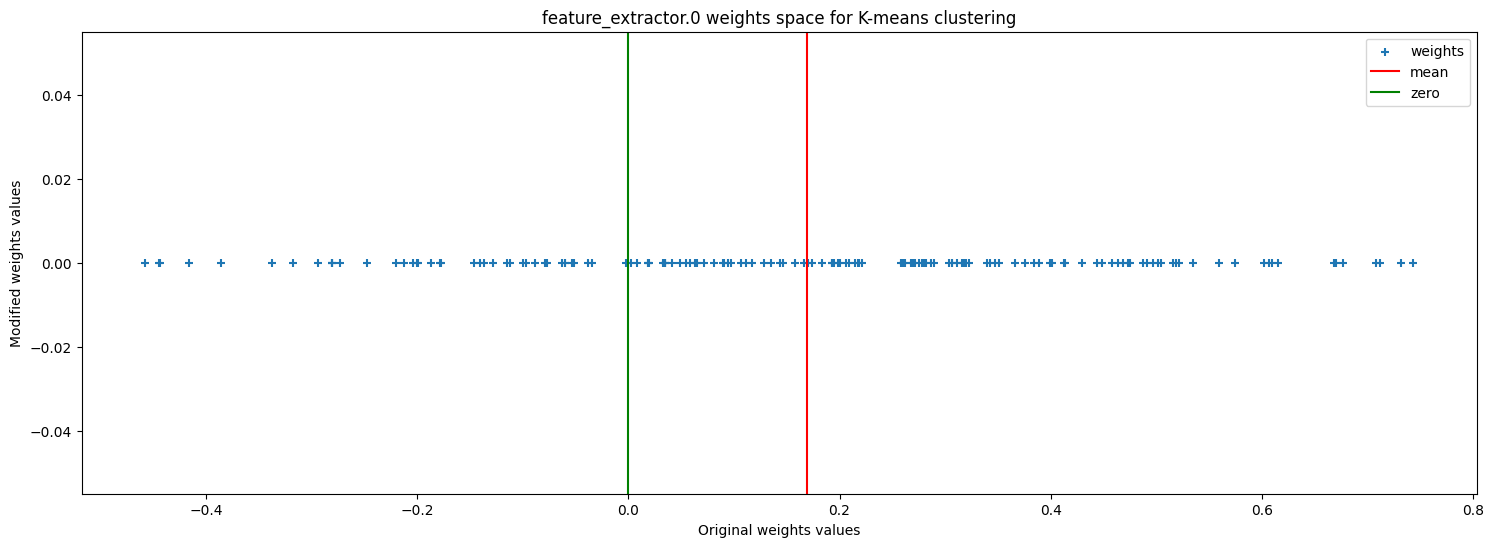

0.9848
layer_name #weights #bias w_locked CR
feature_extractor.0 5 6 True 7.68
feature_extractor.3 2400 16 False 1.00
feature_extractor.6 48000 120 False 1.00
classifier.0 10080 84 False 1.00
classifier.2 840 10 False 1.00
Sum num weights, bias:  61325 236
Compression rate 2.34


<Figure size 640x480 with 0 Axes>

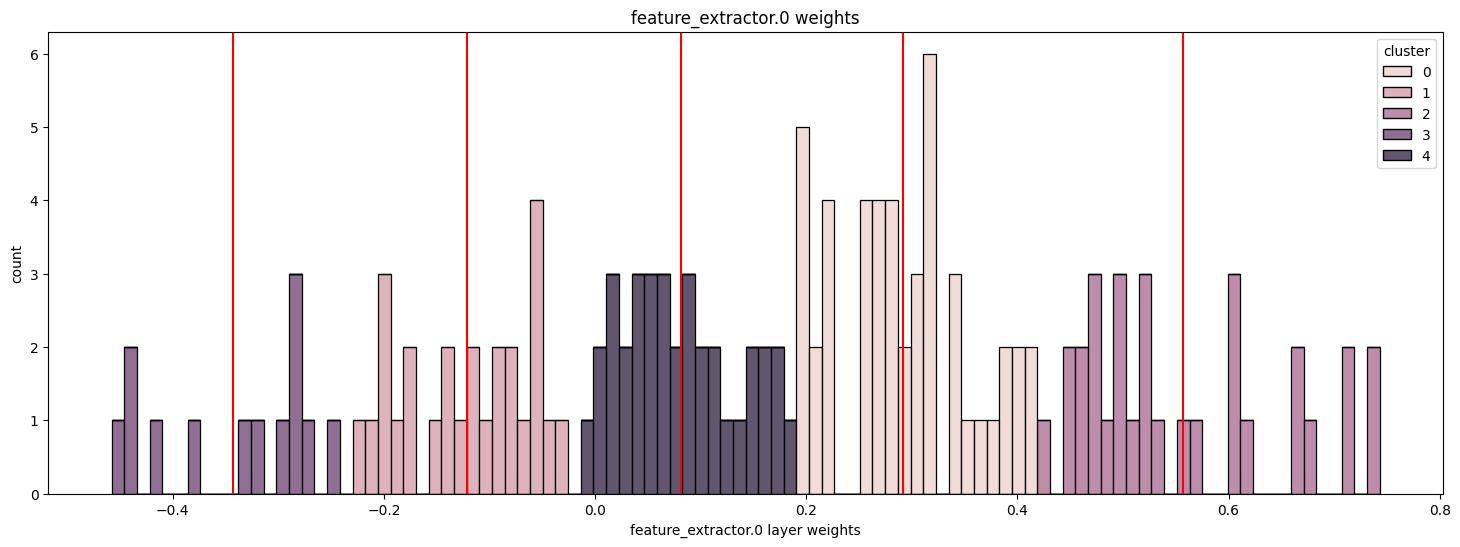

In [7]:
ws_controller.model_layers[LAYER].share_weight(CLUSTERS, plot=True, assign=True, unlock=False, prec_rtype='f4')
print(ws_controller.test())
ws_controller.print_layers_info()

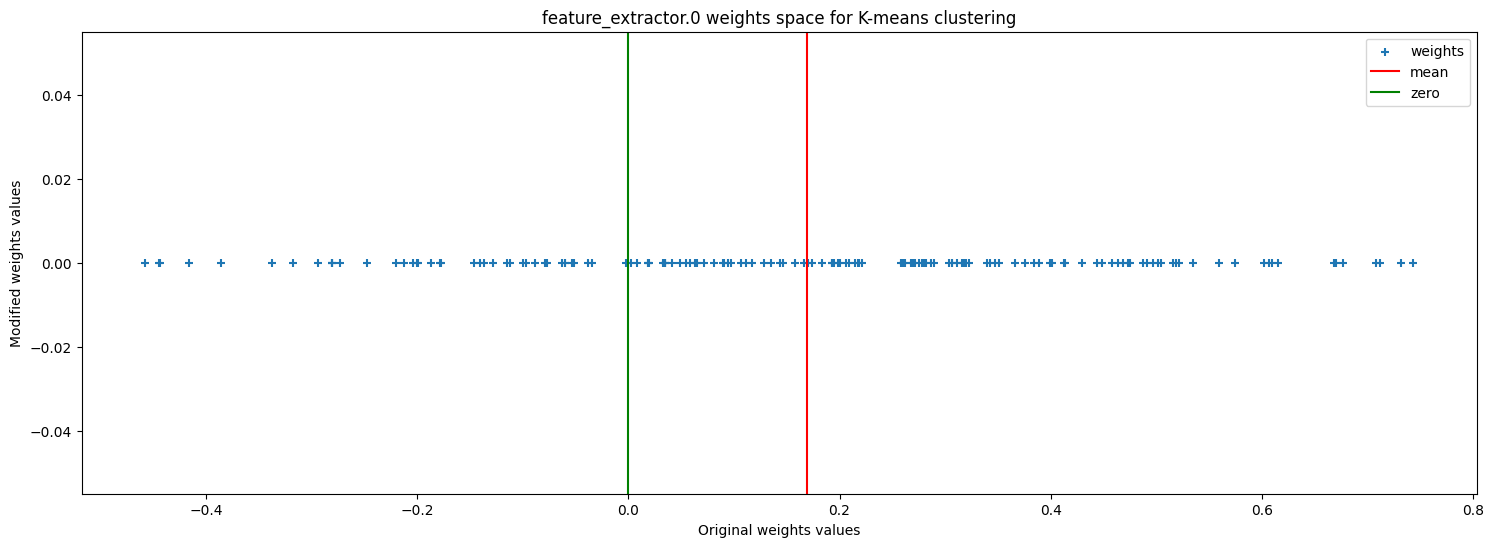

0.9848
layer_name #weights #bias w_locked CR
feature_extractor.0 5 6 True 8.81
feature_extractor.3 2400 16 False 1.00
feature_extractor.6 48000 120 False 1.00
classifier.0 10080 84 False 1.00
classifier.2 840 10 False 1.00
Sum num weights, bias:  61325 236
Compression rate 2.56


<Figure size 640x480 with 0 Axes>

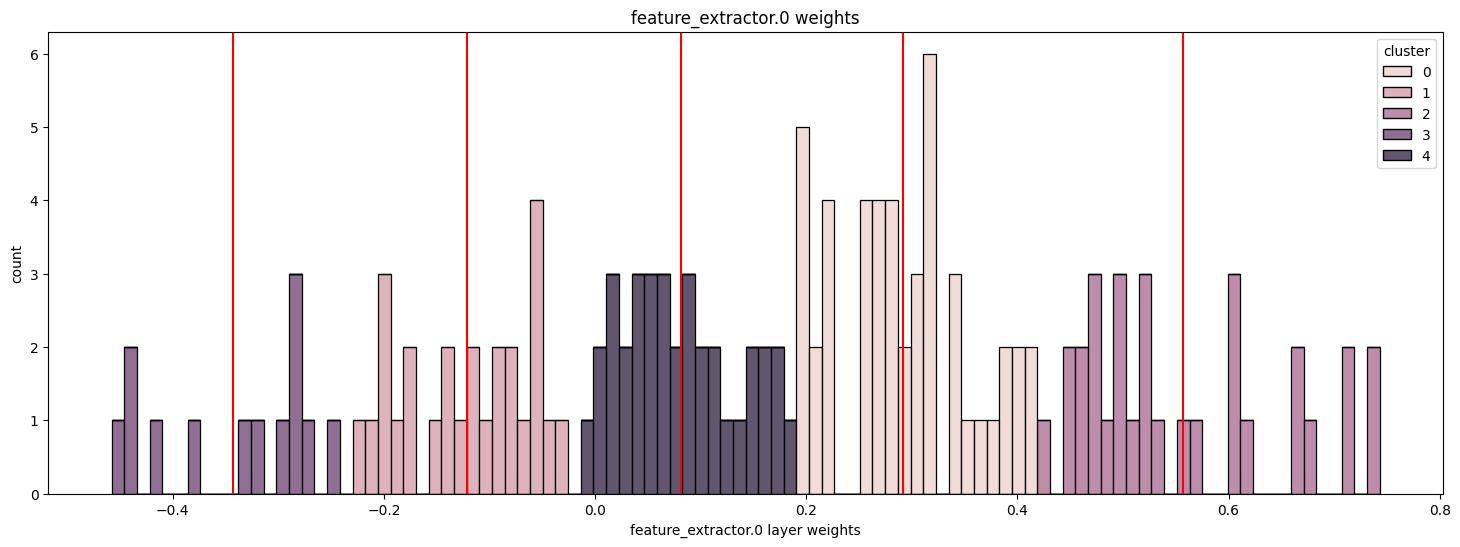

In [8]:
ws_controller.reset()
ws_controller.model_layers[LAYER].share_weight(CLUSTERS, plot=True, assign=True, unlock=False, prec_rtype='f2')
print(ws_controller.test())
ws_controller.print_layers_info()

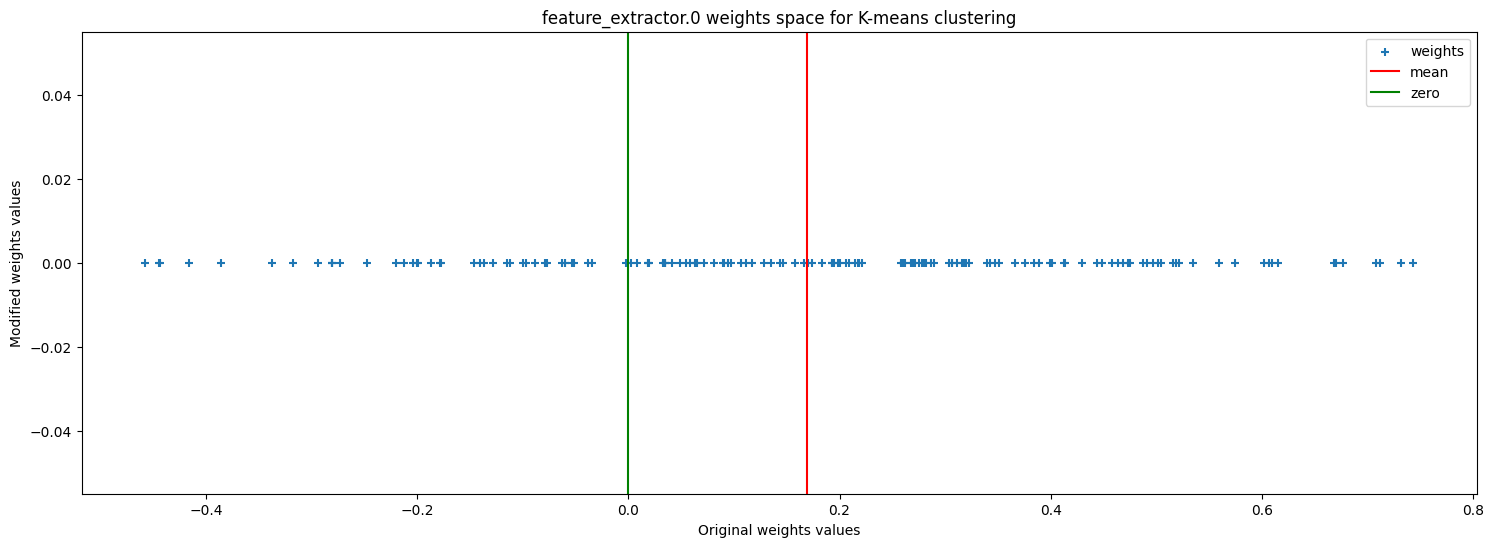

0.9846
layer_name #weights #bias w_locked CR
feature_extractor.0 5 6 True 9.50
feature_extractor.3 2400 16 False 1.00
feature_extractor.6 48000 120 False 1.00
classifier.0 10080 84 False 1.00
classifier.2 840 10 False 1.00
Sum num weights, bias:  61325 236
Compression rate 2.70


<Figure size 640x480 with 0 Axes>

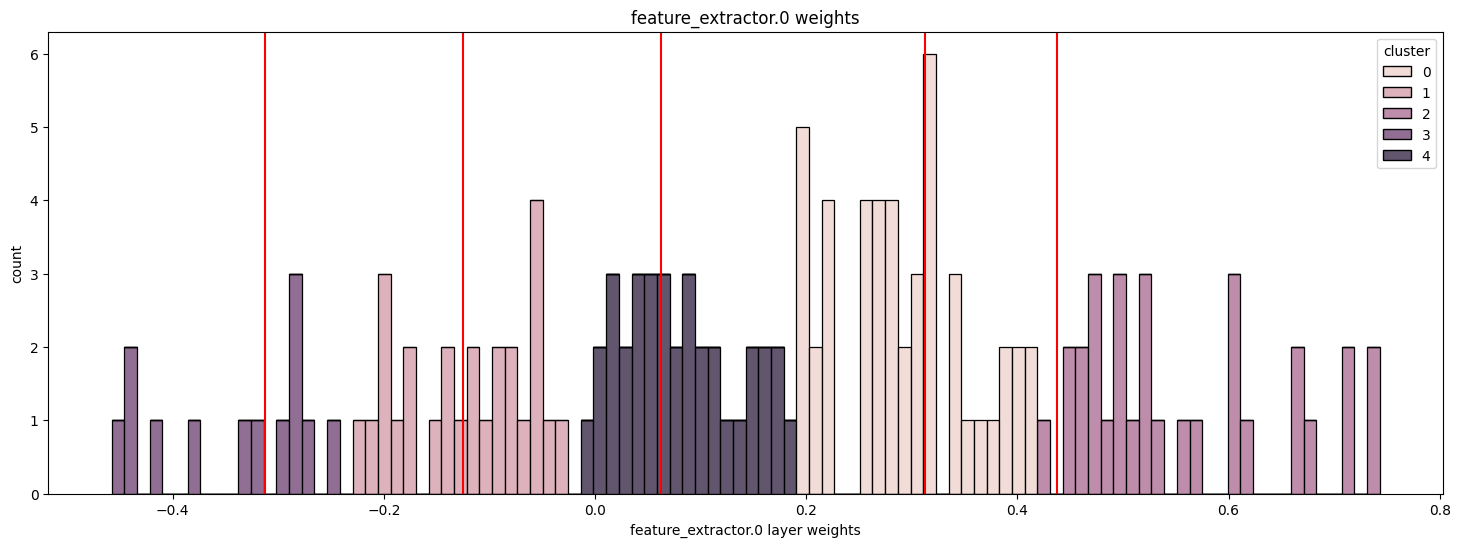

In [9]:
ws_controller.reset()
ws_controller.model_layers[LAYER].share_weight(CLUSTERS, plot=True, assign=True, unlock=False, prec_rtype='f1')
print(ws_controller.test())
ws_controller.print_layers_info()

In [10]:
ws_controller.reset()
print(ws_controller.share([20 for _ in range(5)], prec_reduct=['f4' for _ in range(5)]))
ws_controller.print_layers_info()

{'accuracy': 0.984, 'compression': 5.475749662384564, 'inertias': [0.030819891020655632, 0.22392089664936066, 1.1359038352966309, 0.32675307989120483, 0.04396438226103783], 'times': {'train': 0, 'share': 1.104318618774414, 'test': 0.6546308994293213}}
layer_name #weights #bias w_locked CR
feature_extractor.0 20 6 True 3.22
feature_extractor.3 20 16 True 6.03
feature_extractor.6 20 120 True 6.38
classifier.0 20 84 True 6.31
classifier.2 20 10 True 5.44
Sum num weights, bias:  100 236
Compression rate 5.48


In [11]:
ws_controller.reset()
print(ws_controller.share([20 for _ in range(5)], prec_reduct=['f2' for _ in range(5)]))
ws_controller.print_layers_info()

{'accuracy': 0.984, 'compression': 5.768049560749884, 'inertias': [0.030819891020655632, 0.22392092645168304, 1.1359038352966309, 0.32675305008888245, 0.04396437853574753], 'times': {'train': 0, 'share': 1.0748209953308105, 'test': 0.6921896934509277}}
layer_name #weights #bias w_locked CR
feature_extractor.0 20 6 True 4.10
feature_extractor.3 20 16 True 6.18
feature_extractor.6 20 120 True 6.39
classifier.0 20 84 True 6.35
classifier.2 20 10 True 5.82
Sum num weights, bias:  100 236
Compression rate 5.77


In [12]:
ws_controller.reset()
print(ws_controller.share([20 for _ in range(5)], prec_reduct=['f1' for _ in range(5)]))
ws_controller.print_layers_info()

{'accuracy': 0.9688, 'compression': 5.9607765763198906, 'inertias': [0.030819889158010483, 0.22392091155052185, 1.1359038352966309, 0.32675307989120483, 0.04396437853574753], 'times': {'train': 0, 'share': 1.236962080001831, 'test': 0.7137665748596191}}
layer_name #weights #bias w_locked CR
feature_extractor.0 20 6 True 4.75
feature_extractor.3 20 16 True 6.26
feature_extractor.6 20 120 True 6.39
classifier.0 20 84 True 6.37
classifier.2 20 10 True 6.03
Sum num weights, bias:  100 236
Compression rate 5.96
